In [1]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go
import scipy.cluster.hierarchy as shc
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn import decomposition, preprocessing, metrics
import os


pd.options.display.float_format = "{:.2f}".format
pd.pandas.set_option("display.max_columns", None)

CO_2022 = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/copernicus_2022_allhours.csv")
CO_2020 = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/Copernicus_2020.csv", sep=';')
CO_2021 = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/Copernicus_2021.csv", sep=';')
CO_2023 = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/Copernicus_2023_all_hours.csv")
AP_complete = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/airparif_2020.csv", sep=';')
meteo = pd.read_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/meteo.csv", sep=';')

In [13]:
CO_2020['Date'] = pd.to_datetime(CO_2020['Date'])
CO_2020.info()
CO_2020.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2928 non-null   datetime64[ns]
 1   Copernicus_pm10   2928 non-null   float64       
 2   Copernicus_pm2p5  2928 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 68.8 KB


,Date,Copernicus_pm10,Copernicus_pm2p5
0,2020-01-09 00:00:00,13.76,4.38
1,2020-01-09 01:00:00,12.70,4.10
2,2020-01-09 02:00:00,12.57,4.44
3,2020-01-09 03:00:00,12.89,4.39
4,2020-01-09 04:00:00,13.52,4.17
5,2020-01-09 05:00:00,12.92,3.97
6,2020-01-09 06:00:00,14.12,4.45
7,2020-01-09 07:00:00,15.07,5.33
8,2020-01-09 08:00:00,14.33,5.27
9,2020-01-09 09:00:00,12.67,4.56


In [14]:
CO_2021['time'] = pd.to_datetime(CO_2021['time'])
CO_2021= CO_2021.sort_values(["time"],ascending=True)
CO_2021.info()
CO_2021.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              8760 non-null   datetime64[ns]
 1   Copernicus_pm10   8760 non-null   float64       
 2   Copernicus_pm2p5  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 273.8 KB


,time,Copernicus_pm10,Copernicus_pm2p5
0,2021-01-01 00:00:00,36.97,29.02
1,2021-01-01 01:00:00,36.38,30.02
2,2021-01-01 02:00:00,37.19,31.85
3,2021-01-01 03:00:00,39.03,32.56
4,2021-01-01 04:00:00,35.43,31.46
5,2021-01-01 05:00:00,35.32,30.54
6,2021-01-01 06:00:00,33.65,27.54
7,2021-01-01 07:00:00,33.86,26.76
8,2021-01-01 08:00:00,38.03,27.90
9,2021-01-01 09:00:00,37.23,26.26


In [15]:
CO_2022= CO_2022.sort_values(["Date"],ascending=True)
CO_2022['Date'] = pd.to_datetime(CO_2022['Date'])
CO_2022.info()
CO_2021.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Copernicus_pm10   8760 non-null   float64       
 2   Copernicus_pm2p5  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 273.8 KB


,time,Copernicus_pm10,Copernicus_pm2p5
0,2021-01-01 00:00:00,36.97,29.02
1,2021-01-01 01:00:00,36.38,30.02
2,2021-01-01 02:00:00,37.19,31.85
3,2021-01-01 03:00:00,39.03,32.56
4,2021-01-01 04:00:00,35.43,31.46
5,2021-01-01 05:00:00,35.32,30.54
6,2021-01-01 06:00:00,33.65,27.54
7,2021-01-01 07:00:00,33.86,26.76
8,2021-01-01 08:00:00,38.03,27.90
9,2021-01-01 09:00:00,37.23,26.26


In [41]:
AP_complete= AP_complete.sort_values(["Date"],ascending=True)
AP_complete['Date'] = pd.to_datetime(AP_complete['Date'])
AP_complete = AP_complete.rename(columns={ 'Pm10': 'AirParisPm10' })
AP_complete = AP_complete.rename(columns={ 'Pm25': 'AirParisPm25' })


mask = AP_complete["Date"] < "2020-01-09 00:00:00"

AP_complete = AP_complete.drop(AP_complete[mask].index)

AP_complete.info()
AP_complete.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21063 entries, 5855 to 26303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21063 non-null  datetime64[ns]
 1   AirParisPm10  21063 non-null  object        
 2   AirParisPm25  21063 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 658.2+ KB


,Date,AirParisPm10,AirParisPm25
5855,2020-01-09 00:00:00,16,"5,8"
5856,2020-01-09 01:00:00,"18,3","6,5"
5857,2020-01-09 02:00:00,"16,8","5,4"
5858,2020-01-09 03:00:00,"14,6","5,1"
5859,2020-01-09 04:00:00,"14,2","4,3"
5860,2020-01-09 05:00:00,"16,1","3,7"
5861,2020-01-09 06:00:00,"17,7","5,4"
5862,2020-01-09 07:00:00,"24,9","8,6"
5863,2020-01-09 08:00:00,"36,6","12,2"
5864,2020-01-09 09:00:00,"44,6","15,6"


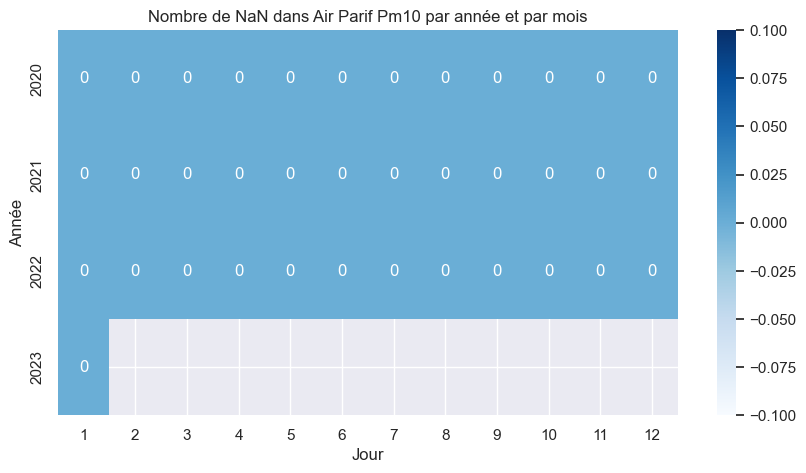

In [43]:
AP_copy = AP_complete.copy()

AP_copy['year'] = AP_copy['Date'].dt.year
AP_copy['month'] = AP_copy['Date'].dt.month
AP_copy['day'] = AP_copy['Date'].dt.day

nan_count = AP_copy.groupby(['year', 'month'])['AirParisPm10'].apply(lambda x: x.isna().sum()).reset_index()

nan_count = nan_count.pivot(index='year', columns=['month'], values='AirParisPm10')

sns.heatmap(nan_count, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Jour')
plt.ylabel('Année')
plt.title('Nombre de NaN dans Air Parif Pm10 par année et par mois')
sns.set(rc={'figure.figsize':(10, 5)})
plt.show()


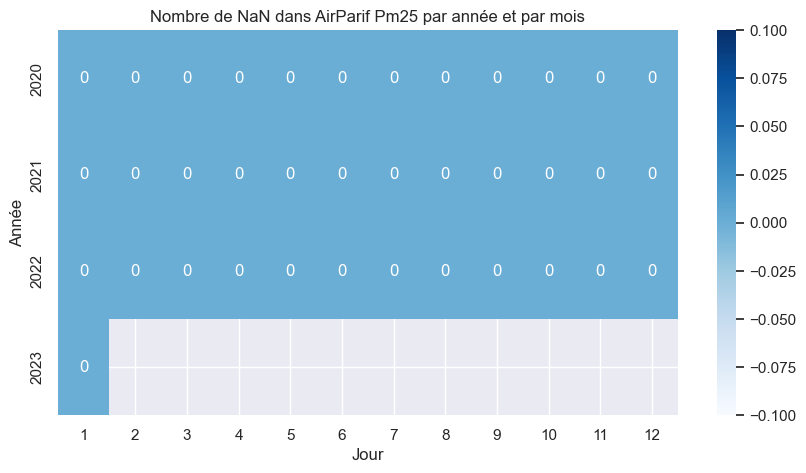

In [44]:
nan_count = AP_copy.groupby(['year', 'month'])['AirParisPm25'].apply(lambda x: x.isna().sum()).reset_index()

nan_count = nan_count.pivot(index='year', columns=['month'], values='AirParisPm25')
sns.heatmap(nan_count, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Jour')
plt.ylabel('Année')
plt.title('Nombre de NaN dans AirParif Pm25 par année et par mois')
sns.set(rc={'figure.figsize':(10, 5)})
plt.show()

In [45]:
AP_complete = AP_complete.dropna()
AP_complete.info()
AP_complete.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21063 entries, 5855 to 26303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21063 non-null  datetime64[ns]
 1   AirParisPm10  21063 non-null  object        
 2   AirParisPm25  21063 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 658.2+ KB


,Date,AirParisPm10,AirParisPm25
5855,2020-01-09 00:00:00,16,"5,8"
5856,2020-01-09 01:00:00,"18,3","6,5"
5857,2020-01-09 02:00:00,"16,8","5,4"
5858,2020-01-09 03:00:00,"14,6","5,1"
5859,2020-01-09 04:00:00,"14,2","4,3"


In [46]:
CO_2021 = CO_2021.rename(columns={ 'time': 'Date' })
CO_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Copernicus_pm10   8760 non-null   float64       
 2   Copernicus_pm2p5  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 273.8 KB


In [47]:
df = pd.concat([CO_2020,CO_2021, CO_2022], axis=0, ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(["Date"],ascending=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20448 entries, 0 to 20447
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              20448 non-null  datetime64[ns]
 1   Copernicus_pm10   20448 non-null  float64       
 2   Copernicus_pm2p5  20448 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 639.0 KB


In [48]:
AP_complete= AP_complete.sort_values(["Date"],ascending=True)
AP_complete['Date'] = pd.to_datetime(AP_complete['Date'])
AP_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21063 entries, 5855 to 26303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21063 non-null  datetime64[ns]
 1   AirParisPm10  21063 non-null  object        
 2   AirParisPm25  21063 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 658.2+ KB


In [49]:
df_comp = pd.merge(AP_complete, df, on ="Date", how="outer")
print(df_comp.info())
print("----")
print(df_comp.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24473 entries, 0 to 24472
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              24473 non-null  datetime64[ns]
 1   AirParisPm10      21063 non-null  object        
 2   AirParisPm25      21063 non-null  object        
 3   Copernicus_pm10   20450 non-null  float64       
 4   Copernicus_pm2p5  20450 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.1+ MB
None
----
Date                24470
AirParisPm10          763
AirParisPm25          572
Copernicus_pm10     13915
Copernicus_pm2p5    13396
dtype: int64


In [50]:
df_comp= df_comp.sort_values(["Date"],ascending=True)
df_comp.head(50)

,Date,AirParisPm10,AirParisPm25,Copernicus_pm10,Copernicus_pm2p5
0,2020-01-09 00:00:00,16,"5,8",13.76,4.38
1,2020-01-09 01:00:00,"18,3","6,5",12.70,4.10
2,2020-01-09 02:00:00,"16,8","5,4",12.57,4.44
3,2020-01-09 03:00:00,"14,6","5,1",12.89,4.39
4,2020-01-09 04:00:00,"14,2","4,3",13.52,4.17
5,2020-01-09 05:00:00,"16,1","3,7",12.92,3.97
6,2020-01-09 06:00:00,"17,7","5,4",14.12,4.45
7,2020-01-09 07:00:00,"24,9","8,6",15.07,5.33
8,2020-01-09 08:00:00,"36,6","12,2",14.33,5.27
9,2020-01-09 09:00:00,"44,6","15,6",12.67,4.56


In [51]:
df_comp = df_comp.dropna()
df_comp.info()
df_comp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17040 entries, 0 to 21061
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17040 non-null  datetime64[ns]
 1   AirParisPm10      17040 non-null  object        
 2   AirParisPm25      17040 non-null  object        
 3   Copernicus_pm10   17040 non-null  float64       
 4   Copernicus_pm2p5  17040 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 798.8+ KB


,Date,AirParisPm10,AirParisPm25,Copernicus_pm10,Copernicus_pm2p5
0,2020-01-09 00:00:00,16,"5,8",13.76,4.38
1,2020-01-09 01:00:00,"18,3","6,5",12.70,4.10
2,2020-01-09 02:00:00,"16,8","5,4",12.57,4.44
3,2020-01-09 03:00:00,"14,6","5,1",12.89,4.39
4,2020-01-09 04:00:00,"14,2","4,3",13.52,4.17


In [52]:
# Remplacer la virgule par un point dans la colonne 'Pm10'
df_comp['AirParisPm10'] = df_comp['AirParisPm10'].str.replace(',', '.')
df_comp['AirParisPm25'] = df_comp['AirParisPm25'].str.replace(',', '.')


df_comp['AirParisPm10'] = df_comp['AirParisPm10'].astype(float)
df_comp['AirParisPm25'] = df_comp['AirParisPm25'].astype(float)
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17040 entries, 0 to 21061
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17040 non-null  datetime64[ns]
 1   AirParisPm10      17040 non-null  float64       
 2   AirParisPm25      17040 non-null  float64       
 3   Copernicus_pm10   17040 non-null  float64       
 4   Copernicus_pm2p5  17040 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 798.8 KB


In [53]:
df_comp.head()

,Date,AirParisPm10,AirParisPm25,Copernicus_pm10,Copernicus_pm2p5
0,2020-01-09 00:00:00,16.00,5.80,13.76,4.38
1,2020-01-09 01:00:00,18.30,6.50,12.70,4.10
2,2020-01-09 02:00:00,16.80,5.40,12.57,4.44
3,2020-01-09 03:00:00,14.60,5.10,12.89,4.39
4,2020-01-09 04:00:00,14.20,4.30,13.52,4.17


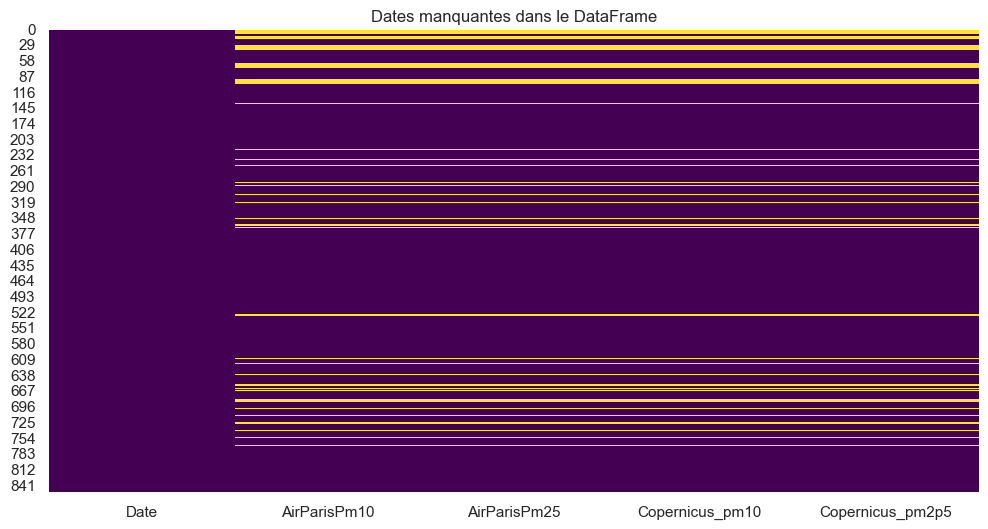

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_na = df_comp.set_index('Date').copy()

start = '2020-09-01 00:00:00'
end = '2022-12-31 23:00:00'
date_range = pd.date_range(start, end, freq='D')
all_dates_df = pd.DataFrame({'Date': date_range})

merged_df = pd.merge(all_dates_df, df_na, on='Date', how='left')

merged_df.fillna(np.nan, inplace=True)

plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Dates manquantes dans le DataFrame')
plt.show()


In [55]:
df_comp = df_comp
df_comp = pd.DataFrame(df_comp)
df_comp.to_csv("/Users/colinepiera/bureau/MD5/copernicus_par_an/df_comp.csv")

Corrélation de Pearson entre Pm10 et Copernicus_pm10 : 0.6509774494702131
Corrélation de Pearson entre Pm25 et Copernicus_pm2p5 : 0.6905509504703047
Corrélation de Spearman entre AirParif Pm10 et Copernicus_pm10 : 0.6047735611583497
Corrélation de Spearman entre Air Parif Pm25 et Copernicus_pm2p5 : 0.6499709636118786


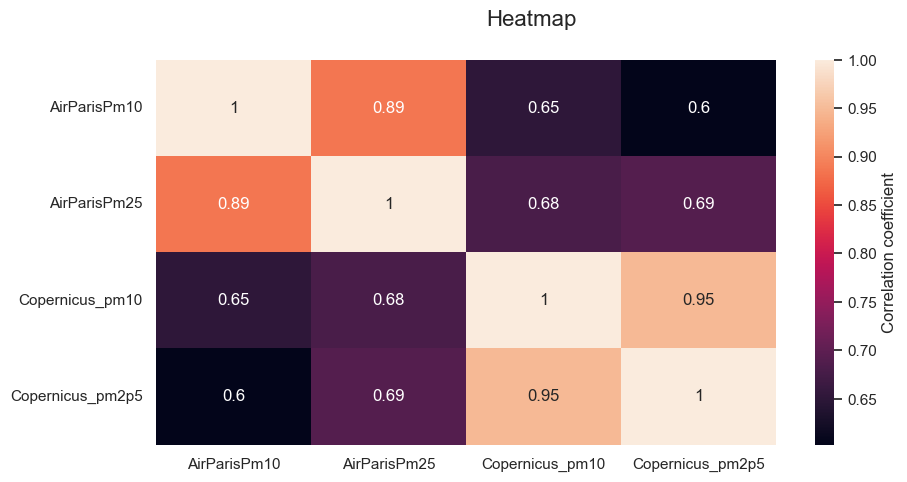

In [57]:
df_num = df_comp.drop('Date', axis=1) 
corr = df_num.corr()  
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cbar_kws={'label': 'Correlation coefficient'}) 

plt.suptitle("Heatmap", fontsize=16)

# Pearson
correlation_pearson = df_comp['AirParisPm10'].corr(df_comp['Copernicus_pm10'])
print(f"Corrélation de Pearson entre Pm10 et Copernicus_pm10 : {correlation_pearson}")
correlation_pearson = df_comp['AirParisPm25'].corr(df_comp['Copernicus_pm2p5'])
print(f"Corrélation de Pearson entre Pm25 et Copernicus_pm2p5 : {correlation_pearson}")

# Spearman
correlation_spearman = df_comp['AirParisPm10'].corr(df_comp['Copernicus_pm10'], method='spearman')
print(f"Corrélation de Spearman entre AirParif Pm10 et Copernicus_pm10 : {correlation_spearman}")
correlation_spearman = df_comp['AirParisPm25'].corr(df_comp['Copernicus_pm2p5'], method='spearman')
print(f"Corrélation de Spearman entre Air Parif Pm25 et Copernicus_pm2p5 : {correlation_spearman}")


Corrélation de Pearson entre Pm10 et Copernicus_pm10 : 0.651

Une corrélation de 0.651 indique une corrélation positive modérée entre les mesures Pm10 et Copernicus_pm10. Cela suggère que les deux mesures ont tendance à évoluer dans la même direction, mais la relation n'est pas parfaite.
Corrélation de Pearson entre Pm25 et Copernicus_pm2p5 : 0.691

Une corrélation de 0.691 indique une corrélation positive modérée à élevée entre les mesures Pm25 et Copernicus_pm2p5. Cela suggère une tendance similaire à celle de Pm10 et Copernicus_pm10, mais avec une corrélation légèrement plus forte.
Corrélation de Spearman entre Pm10 et Copernicus_pm10 : 0.605

Une corrélation de 0.605 selon le coefficient de Spearman indique une corrélation positive modérée. Le coefficient de Spearman est moins sensible aux valeurs aberrantes et mesure la relation monotone entre les variables.
Corrélation de Spearman entre Pm25 et Copernicus_pm2p5 : 0.650

Une corrélation de 0.650 indique une corrélation positive modérée à élevée entre les mesures Pm25 et Copernicus_pm2p5 selon le coefficient de Spearman.

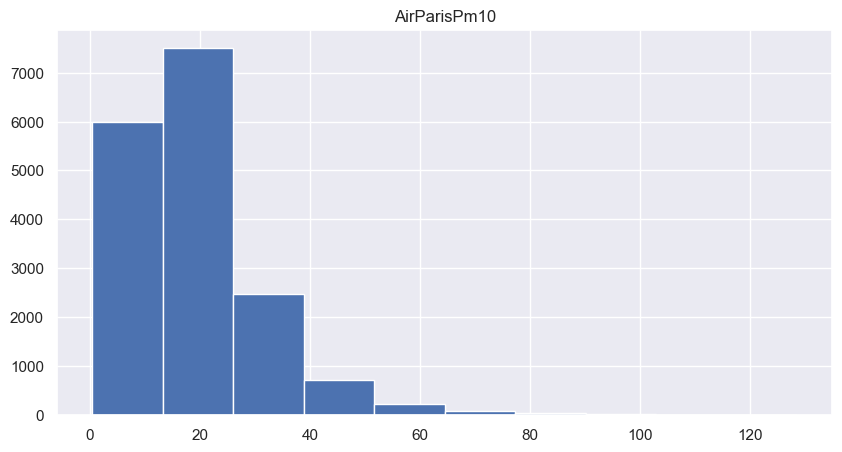

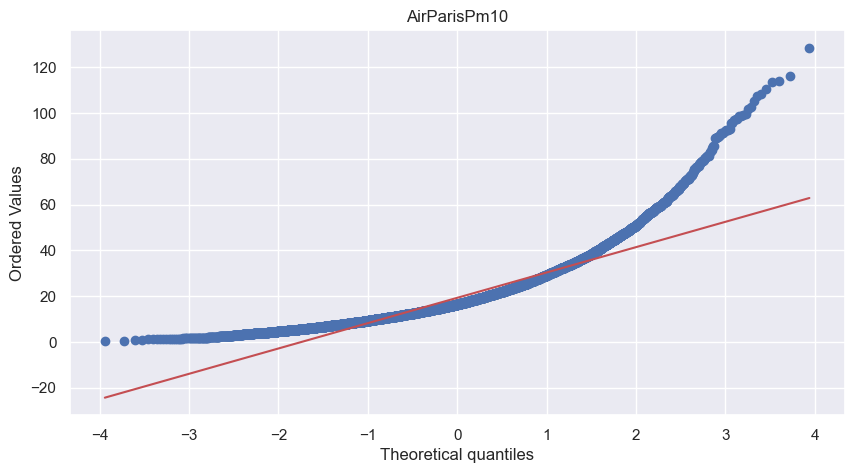

Test de Shapiro-Wilk pour la colonne AirParisPm10: statistique=0.8595, p-valeur=0.0000
Les données de la colonne AirParisPm10 ne sont pas susceptibles de suivre une distribution normale.


/Users/colinepiera/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



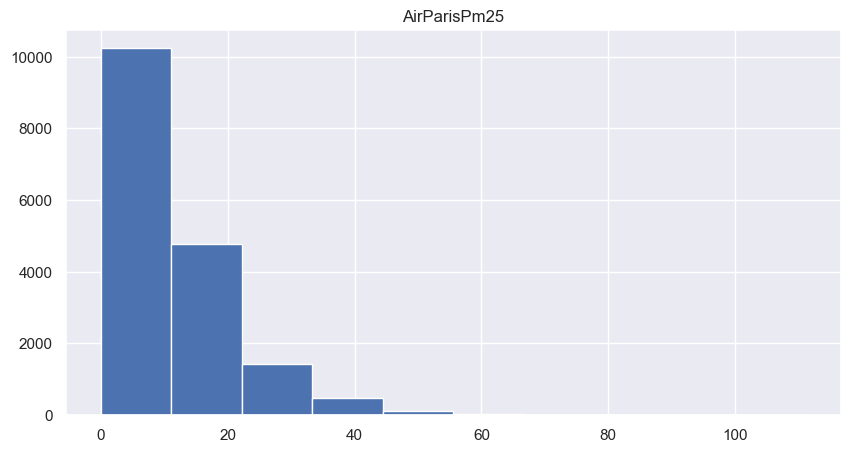

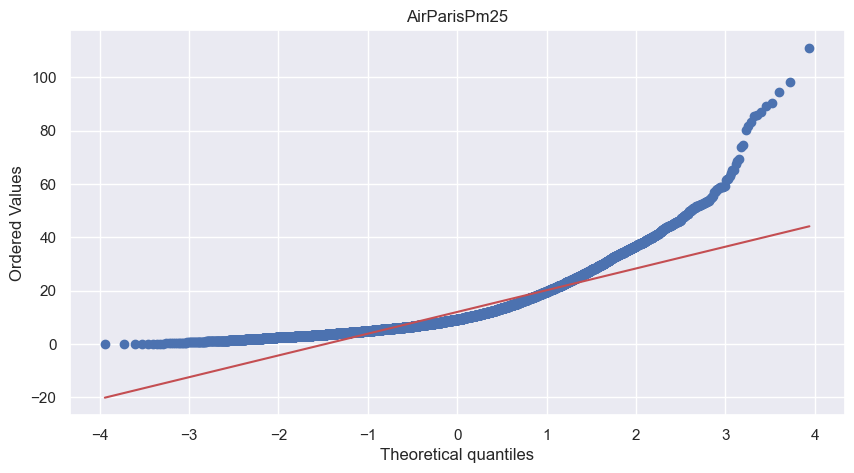

Test de Shapiro-Wilk pour la colonne AirParisPm25: statistique=0.8233, p-valeur=0.0000
Les données de la colonne AirParisPm25 ne sont pas susceptibles de suivre une distribution normale.


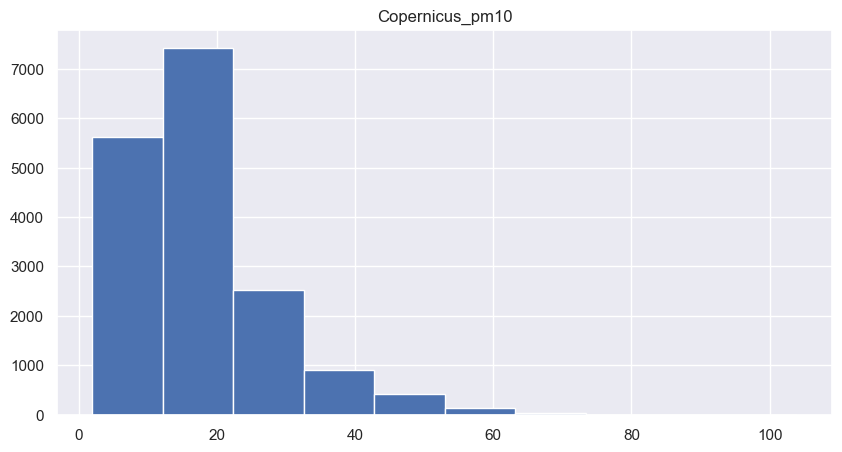

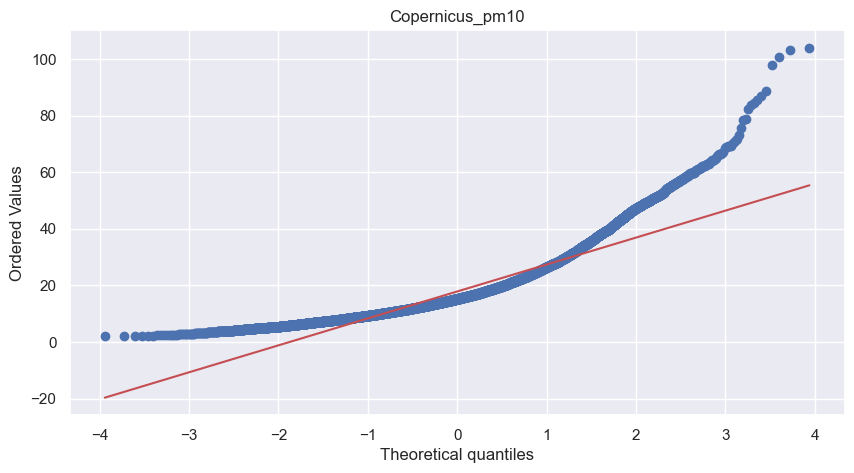

Test de Shapiro-Wilk pour la colonne Copernicus_pm10: statistique=0.8621, p-valeur=0.0000
Les données de la colonne Copernicus_pm10 ne sont pas susceptibles de suivre une distribution normale.


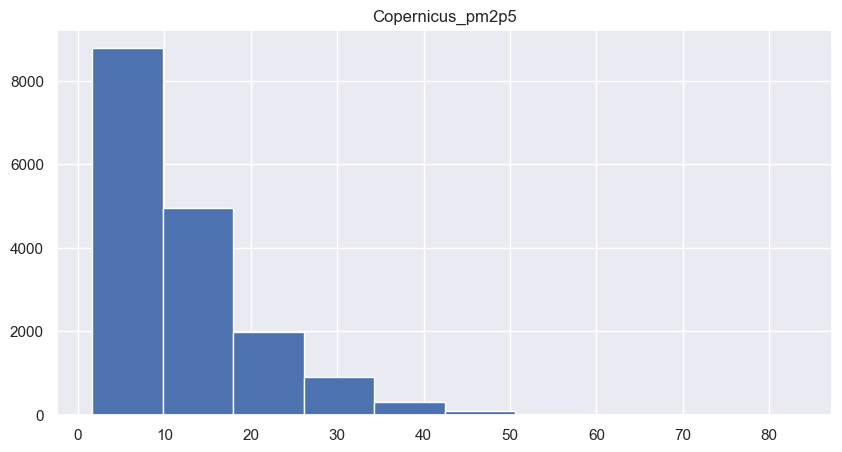

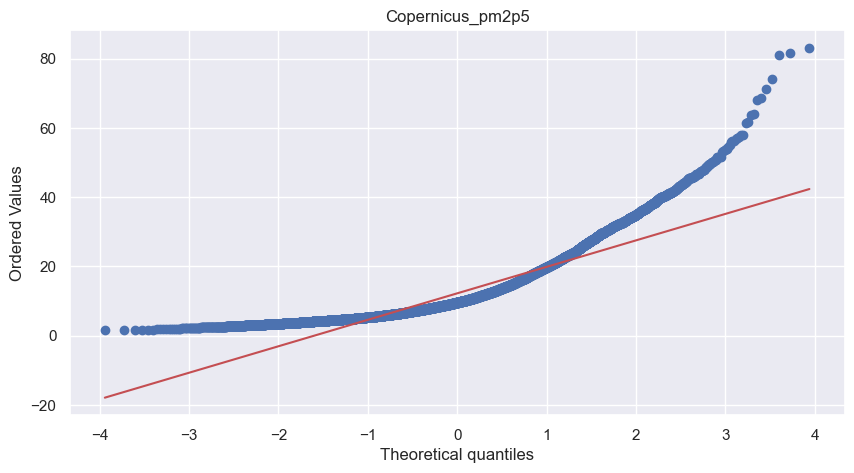

Test de Shapiro-Wilk pour la colonne Copernicus_pm2p5: statistique=0.8393, p-valeur=0.0000
Les données de la colonne Copernicus_pm2p5 ne sont pas susceptibles de suivre une distribution normale.


In [58]:
from scipy import stats
from scipy.stats import probplot, shapiro, ks_2samp, mannwhitneyu, kruskal

# Boucle sur les colonnes du df_numFrame
for column in df_num.columns:
    # Histogramme
    plt.hist(df_num[column], bins=10)
    plt.title(column)
    plt.show()

    # Q-Q plots
    probplot(df_num[column], dist="norm", plot=plt)
    plt.title(column)
    plt.show()

    # Test de Shapiro-Wilk pour évaluer si les données suivent une distribution normale
    stat, p = shapiro(df_num[column])
    print(f"Test de Shapiro-Wilk pour la colonne {column}: statistique={stat:.4f}, p-valeur={p:.4f}")
    if p > 0.05:
        print(f"Les données de la colonne {column} sont susceptibles de suivre une distribution normale.")
    else:
        print(f"Les données de la colonne {column} ne sont pas susceptibles de suivre une distribution normale.")


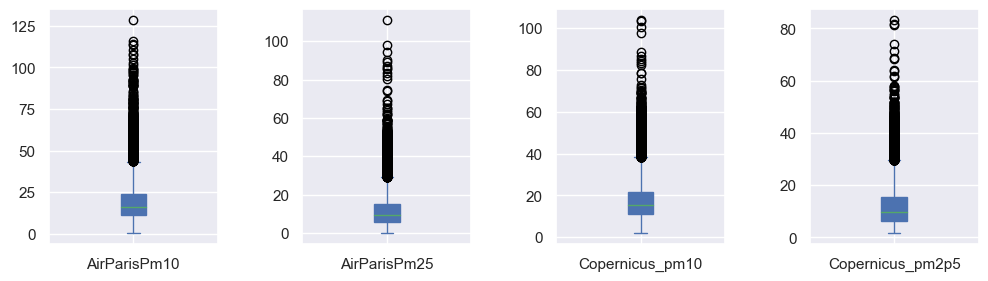

In [59]:
df_comp.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [60]:
df_comp.describe()

,AirParisPm10,AirParisPm25,Copernicus_pm10,Copernicus_pm2p5
count,17040.00,17040.00,17040.00,17040.00
mean,19.26,12.05,17.84,12.24
std,11.93,8.98,10.25,8.35
min,0.50,0.00,2.00,1.66
25%,11.20,6.00,10.90,6.31
50%,16.40,9.20,15.22,9.59
75%,24.10,15.30,21.84,15.56
max,128.50,111.10,103.96,83.21


In [61]:
corr

,AirParisPm10,AirParisPm25,Copernicus_pm10,Copernicus_pm2p5
AirParisPm10,1.00,0.89,0.65,0.60
AirParisPm25,0.89,1.00,0.68,0.69
Copernicus_pm10,0.65,0.68,1.00,0.95
Copernicus_pm2p5,0.60,0.69,0.95,1.00


In [62]:
df_num = df_comp.drop('Date', axis=1) 

Copernicus_pm2p5   0.60
Copernicus_pm10    0.65
AirParisPm25       0.89
AirParisPm10       1.00
Name: AirParisPm10, dtype: float64

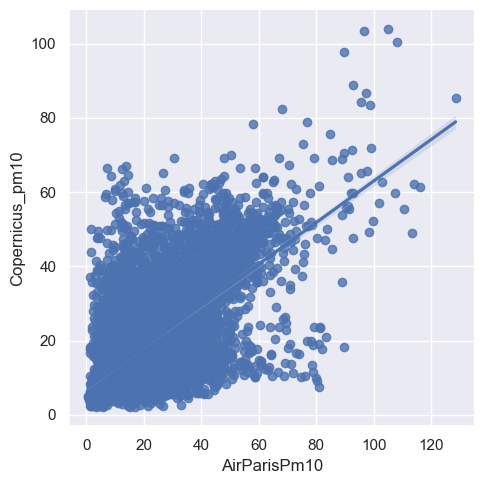

In [64]:
sns.lmplot(x='AirParisPm10', y='Copernicus_pm10', data=df_comp)
#Coefficient de corrélation linéaire de Pearson entre length et margin_low
corr["AirParisPm10"].sort_values()

Notre corrélation avec PM 10 est la plus forte'Pm25' et 'Pm10' (0.89). Cela suggère qu'il existe une relation linéaire positive relativement forte entre ces deux variables. La corrélation entre 'Pm10' et 'Copernicus_pm10' est également positive mais un peu plus faible (0.65).

Copernicus_pm10    0.68
Copernicus_pm2p5   0.69
AirParisPm10       0.89
AirParisPm25       1.00
Name: AirParisPm25, dtype: float64

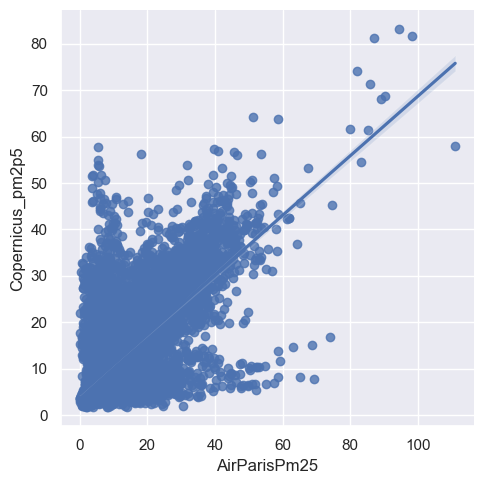

In [65]:
sns.lmplot(x='AirParisPm25', y='Copernicus_pm2p5', data=df_comp)
#Coefficient de corrélation linéaire de Pearson entre length et margin_low
corr["AirParisPm25"].sort_values()

In [2]:
meteo = meteo.dropna(axis=1, how='all')

In [3]:
meteo.describe()

,NUM_POSTE,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,DXY,QDXY,HXY,QHXY,FXI,QFXI,DXI,QDXI,HXI,QHXI,FXI3S,QFXI3S,QDXI3S,HFXI3S,QHFXI3S,T,QT,TD,QTD,TN,QTN,HTN,QHTN,TX,QTX,HTX,QHTX,DG,QDG,T10,QT10,T20,QT20,T50,QT50,T100,QT100,TNSOL,QTNSOL,TN50,QTN50,TCHAUSSEE,QTCHAUSSEE,U,QU,UN,QUN,HUN,QHUN,UX,QUX,HUX,QHUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,TSV,QTSV,PMER,QPMER,PSTAT,QPSTAT,PMERMIN,QPERMIN,VV,QVV,DVV200,QDVV200,WW,QWW,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
count,104039.00,104039.00,104039.00,104039.00,104039.00,69888.00,70176.00,17479.00,17860.00,51193.00,51193.00,50943.00,51193.00,50472.00,50472.00,50221.00,50472.00,50471.00,50471.00,51175.00,51175.00,50925.00,51175.00,51174.00,51174.00,17541.00,17565.00,24.00,17541.00,17565.00,104005.00,104031.00,35060.00,35060.00,104000.00,104026.00,103893.00,103919.00,103993.00,104027.00,103886.00,103920.00,103966.00,103992.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,35086.00,35088.00,17544.00,17544.00,35080.00,35080.00,35087.00,35087.00,35088.00,35088.00,35084.00,35084.00,35086.00,35086.00,35084.00,35084.00,35073.00,35073.00,35073.00,35073.00,35060.00,35060.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,17544.00,17537.00,17537.00,17541.00,17541.00,17353.00,17392.00,35062.00,35062.00,35047.00,35047.00,35014.00,35061.00,34999.00,35046.00
mean,75111219.55,48.85,2.32,98.64,2020560608.75,0.07,1.00,4.33,8.83,4.21,1.00,179.72,1.00,5.04,1.00,184.17,1.00,1173.04,9.00,8.31,1.00,189.90,1.00,1177.12,9.00,7.02,1.00,1.00,1179.58,8.99,13.07,1.36,7.45,1.24,12.67,1.44,1172.57,9.00,13.49,1.44,1174.16,9.00,0.96,9.00,13.56,9.00,13.44,9.00,13.39,9.00,13.25,9.00,11.83,8.98,12.75,9.00,12.58,8.99,72.18,1.24,69.65,1.24,1172.07,9.00,74.75,1.24,1171.98,9.00,3.68,9.00,25.19,9.00,10.94,1.24,1017.06,1.00,1007.69,1.00,1016.84,1.00,17910.84,9.00,0.00,9.00,4.60,9.00,0.01,8.90,50.74,9.00,50.74,9.00,13.55,8.99,13.55,8.99
std,3756.37,0.02,0.04,101.19,501601.19,0.52,0.00,13.30,1.16,3.24,0.15,106.98,0.00,3.42,0.04,105.54,0.00,691.84,0.00,4.82,0.00,102.37,0.00,691.70,0.00,3.16,0.00,0.00,691.82,0.30,6.87,1.66,5.45,1.36,6.76,1.83,698.47,0.14,6.98,1.83,687.63,0.16,7.34,0.13,6.07,0.00,5.83,0.00,5.06,0.00,4.06,0.00,8.44,0.36,7.38,0.00,8.07,0.23,17.86,1.36,18.42,1.36,689.32,0.00,17.04,1.36,697.05,0.00,13.61,0.00,28.62,0.00,3.88,1.36,9.28,0.06,9.18,0.00,9.32,0.00,4258.68,0.00,0.13,0.00,15.78,0.00,0.10,0.90,79.23,0.12,79.23,0.12,21.92,0.31,21.92,0.31
min,75106001.00,48.82,2.23,27.00,2020010100.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,9.00,0.00,1.00,0.00,1.00,0.00,9.00,0.80,1.00,1.00,0.00,1.00,-8.40,1.00,-12.80,1.00,-8.40,1.00,0.00,1.00,-8.00,1.00,0.00,1.00,0.00,1.00,1.80,9.00,2.40,9.00,4.70,9.00,7.00,9.00,-10.20,1.00,-5.50,9.00,-7.10,1.00,17.00,1.00,14.00,1.00,0.00,9.00,19.00,1.00,0.00,9.00,0.00,9.00,0.00,9.00,2.30,1.00,972.20,1.00,962.90,1.00,972.20,1.00,233.00,9.00,0.00,9.00,0.00,9.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
25%,75107005.00,48.82,2.29,46.00,2020062914.50,0.00,1.00,0.00,9.00,2.10,1.00,70.00,1.00,2.80,1.00,80.00,1.00,600.00,9.00,5.00,1.00,100.00,1.00,600.00,9.00,4.70,1.00,1.00,600.00,9.00,8.00,1.00,3.60,1.00,7.70,1.00,556.00,9.00,8.30,1.00,600.00,9.00,0.00,9.00,8.00,9.00,8.00,9.00,8.40,9.00,9.20,9.00,6.00,9.00,7.30,9.00,7.00,9.00,60.00,1.00,56.00,1.00,600.00,9.00,63.00,1.00,558.00,9.00,0.00,9.00,0.00,9.00,7.90,1.00,1012.00,1.00,1002.80,1.00,1011.80,1.00,18762.50,9.00,0.00,9.00,0.00,9.00,0.00,9.00,0.00,9.00,0.00,9.00,0.00,9.00,0.00,9.00
50%,75114001.00,48.84,2.34,55.00,2020122706.00,0.00,1.00,0.00,9.00,3.40,1.00,200.00,1.00,4.20,1.00,200.00,1.00,1157.00,9.00,7.50,1.00,210.00,1.00,1159.00,9.00,6.60,1.00,1.00,1200.00,9.00,12.50,1.00,7.60,1.00,12.20,1.00,1146.00,9.00,12.90,1.00,1200.00,9.00,0.00,9.00,13.00,9.00,12.90,9.00,13.20,9.00,13.00,9.00,10.80,9.00,11.90,9.00,11.40,9.00,76.00,1.00,73.00,1.00,1200.00,9.00,78.00,1.00,1157.00,9.00,0.00,9.00,0.00,9.00,10.40,1.00,1017.90,1.00,1008.65,1.00,1017.70,1

In [7]:


# Filtre le DataFrame en fonction de la LAT avec une tolérance
lat_filtre = 48.85
tolerance = 0.01  # Tolérance pour les comparaisons

meteo = meteo.loc[meteo['LAT'].between(lat_filtre - tolerance, lat_filtre + tolerance)]

# Affiche le DataFrame filtré
print("\nDataFrame filtré avec tolérance :")
print(meteo)



DataFrame filtré avec tolérance :
        NUM_POSTE   NOM_USUEL   LAT  LON  ALTI  AAAAMMJJHH  RR1  QRR1  DRR1  \
0        75106001  LUXEMBOURG 48.84 2.33    46  2020010100 0.00  1.00   NaN   
1        75106001  LUXEMBOURG 48.84 2.33    46  2020010101 0.00  1.00   NaN   
2        75106001  LUXEMBOURG 48.84 2.33    46  2020010102 0.00  1.00   NaN   
3        75106001  LUXEMBOURG 48.84 2.33    46  2020010103 0.00  1.00   NaN   
4        75106001  LUXEMBOURG 48.84 2.33    46  2020010104 0.00  1.00   NaN   
...           ...         ...   ...  ...   ...         ...  ...   ...   ...   
104034   75116008   LONGCHAMP 48.85 2.23    27  2021123119 0.00  1.00   NaN   
104035   75116008   LONGCHAMP 48.85 2.23    27  2021123120 0.00  1.00   NaN   
104036   75116008   LONGCHAMP 48.85 2.23    27  2021123121 0.00  1.00   NaN   
104037   75116008   LONGCHAMP 48.85 2.23    27  2021123122 0.00  1.00   NaN   
104038   75116008   LONGCHAMP 48.85 2.23    27  2021123123 0.00  1.00   NaN   

        QDRR1   

In [11]:
lat_filtre = 2.23
tolerance = 0.01  # Tolérance pour les comparaisons

meteo = meteo.loc[meteo['LON'].between(lat_filtre - tolerance, lat_filtre + tolerance)]

# Affiche le DataFrame filtré
print("\nDataFrame filtré avec tolérance :")
print(meteo)



DataFrame filtré avec tolérance :
        NUM_POSTE  NOM_USUEL   LAT  LON  ALTI  AAAAMMJJHH  RR1  QRR1  DRR1  \
86495    75116008  LONGCHAMP 48.85 2.23    27  2020010100 0.00  1.00   NaN   
86496    75116008  LONGCHAMP 48.85 2.23    27  2020010101 0.00  1.00   NaN   
86497    75116008  LONGCHAMP 48.85 2.23    27  2020010102 0.00  1.00   NaN   
86498    75116008  LONGCHAMP 48.85 2.23    27  2020010103 0.00  1.00   NaN   
86499    75116008  LONGCHAMP 48.85 2.23    27  2020010104 0.00  1.00   NaN   
...           ...        ...   ...  ...   ...         ...  ...   ...   ...   
104034   75116008  LONGCHAMP 48.85 2.23    27  2021123119 0.00  1.00   NaN   
104035   75116008  LONGCHAMP 48.85 2.23    27  2021123120 0.00  1.00   NaN   
104036   75116008  LONGCHAMP 48.85 2.23    27  2021123121 0.00  1.00   NaN   
104037   75116008  LONGCHAMP 48.85 2.23    27  2021123122 0.00  1.00   NaN   
104038   75116008  LONGCHAMP 48.85 2.23    27  2021123123 0.00  1.00   NaN   

        QDRR1   FF  QFF     

In [12]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 86495 to 104038
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NUM_POSTE   17544 non-null  int64  
 1   NOM_USUEL   17544 non-null  object 
 2   LAT         17544 non-null  float64
 3   LON         17544 non-null  float64
 4   ALTI        17544 non-null  int64  
 5   AAAAMMJJHH  17544 non-null  int64  
 6   RR1         17400 non-null  float64
 7   QRR1        17544 non-null  float64
 8   DRR1        0 non-null      float64
 9   QDRR1       144 non-null    float64
 10  FF          17460 non-null  float64
 11  QFF         17460 non-null  float64
 12  DD          17210 non-null  float64
 13  QDD         17460 non-null  float64
 14  FXY         17459 non-null  float64
 15  QFXY        17459 non-null  float64
 16  DXY         17208 non-null  float64
 17  QDXY        17459 non-null  float64
 18  HXY         17459 non-null  float64
 19  QHXY        17459 no

In [ ]:
# Changer le format de date pour qu'il soit similaire à notre jeux de données
meteo_df['date_heure'] = pd.to_datetime(meteo_df['AAAAMMJJHH'], format='%Y%m%d%H')

print(meteo_df)


Nous aurions pu choisir la zone la plus proche de la notre en latitude et longitude, choisir certaines variables météréologiques et ajouter cela à notre analyse pour l'approfondir. 